In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

In [28]:
model = tf.keras.models.load_model('model.h5')

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 board (InputLayer)          [(None, 19, 19, 31)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 19, 19, 32)           992       ['board[0][0]']               
                                                                                                  
 batch_normalization (Batch  (None, 19, 19, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 19, 19, 32)           0         ['batch_normalization[0][0

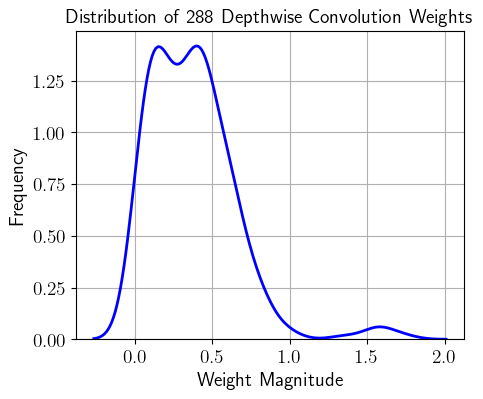

In [34]:
weights = model.get_layer('depthwise_conv2d_24').get_weights()[0]
weights_flat = weights.flatten()
weights_magnitude = np.abs(weights_flat)

plt.figure(figsize=(5, 4))
sns.kdeplot(weights_magnitude, color='b', linewidth=2)
plt.title(f"Distribution of {weights_magnitude.size} Depthwise Convolution Weights")
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()